In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np
import pyspark
from pyspark.sql import *
import pyspark.sql.functions
import csv
%matplotlib inline

In [4]:
data = pd.read_csv('../data/nyc/calendar.csv')

# data_fill = data.dropna()

data['price']=data['price'].str.replace(r'[^-+\d.]', '').astype(float)
data['date']=pd.to_datetime(data['date'])
data['weekday'] = pd.Series(data.date).dt.dayofweek
print(len(data))
# data = data[data["listing_id"].isin(idList)]
print(len(data))
# data.to_csv("./calendar_clean.csv",index=False)

17657768
17657768


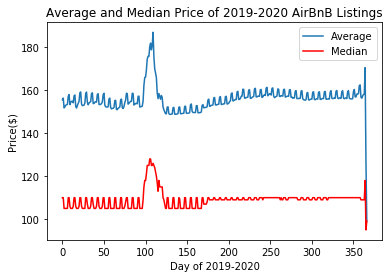

In [5]:
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
rows = []
for i in data['date'].unique():
    tmp = []
    tmp.append(i)
    tmp.append(data[data['date'] == i]['price'].mean())
    tmp.append(data[data['date'] == i]['price'].median())
    date.append(i)
    avg_price.append(data[data['date'] == i]['price'].mean())
    median_price.append(data[data['date'] == i]['price'].median())
    rows.append(tuple(tmp))

headers = ['Date','avg_price','median_price']


with open('nyc_season_stat.csv','w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)
    f_csv.writerows(rows)
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2019-2020')
plt.title('Average and Median Price of 2019-2020 AirBnB Listings')
plt.legend()

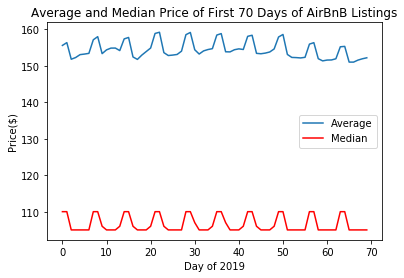

In [6]:
plt.plot(range(len(avg_price[0:70])), avg_price[0:70], label= "Average")
plt.plot(range(len(avg_price[0:70])),median_price[0:70],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2019')
plt.title('Average and Median Price of First 70 Days of AirBnB Listings')
plt.legend()


Text(0.5, 1.0, 'Average Price per Day of the Week')

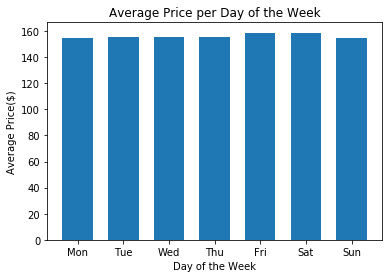

In [8]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['price'].median())
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

Text(0.5, 1.0, 'Median Price per Day of the Week')

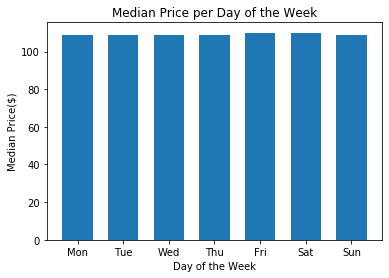

In [9]:
plt.bar(range(len(daily_avg_price)),daily_median_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Median Price($)')
plt.xlabel('Day of the Week')
plt.title('Median Price per Day of the Week')

In [10]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])
multiplier 


[1.0,
 1.003480368098722,
 1.0031599768413688,
 1.0022892374210775,
 1.0248695400908974,
 1.025772363617129,
 1.0004653144412459]